In [1]:
import ase.units as au
from matplotlib import pyplot as plt
import numpy as np
import os
import shutil
import sys
import subprocess

sys.path.insert(0, '/home/misa/git_repositories/APDFT/prototyping/apdft-ofdft-cpmd/')
import profess_io as pio
from density_calculators  import DensityOptimizer as DO
from density_calculators  import DensityOptimizerCPMD as DOC
from cpmd import initialize_atoms

In [2]:
# initialize
pos_file = '/home/misa/software/PROFESS-1/calculate_gradient/job.ion'
vel_file = '/home/misa/git_repositories/PROFESS/test/MD_NVE/saved/vel_step0.dat'
cell_param = [[3.9691, 0, 0], [0, 3.9691, 0], [0, 0, 3.9691]]
atoms = initialize_atoms(pos_file, vel_file, cell_param, pos_type='FRAC')

In [3]:
DOC_Test = DOC()
dt = 0.1
inpt_name = 'job'
mu = 1
wd = '/home/misa/software/PROFESS-1/calculate_gradient'
DOC_Test.initialize(atoms, dt, inpt_name, mu, wd)
DOC_Test.optimize(500)

In [4]:
DO_Test = DO()
dt = 0.1
mu = 1
wd = '/home/misa/software/PROFESS-1/calculate_gradient'
DO_Test.initialize(atoms, dt, mu, wd)
DO_Test.optimize(500)

In [5]:
np.array_equal(np.array(DOC_Test.energies), np.array(DO_Test.energies))

True

In [ ]:
DOC_Test = DOC()
dt = 0.1
mu = 1
wd = '/home/misa/software/PROFESS-1/calculate_gradient'
DOC_Test.initialize(atoms, dt, mu, wd)
DOC_Test.optimize_vv(500)

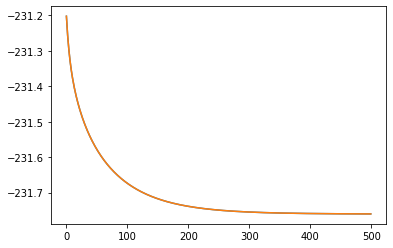

In [6]:
plt.plot(DOC_Test.energies)
plt.plot(DO_Test.energies)